Número de fiscalizações realizadas e resultado de PI por ano

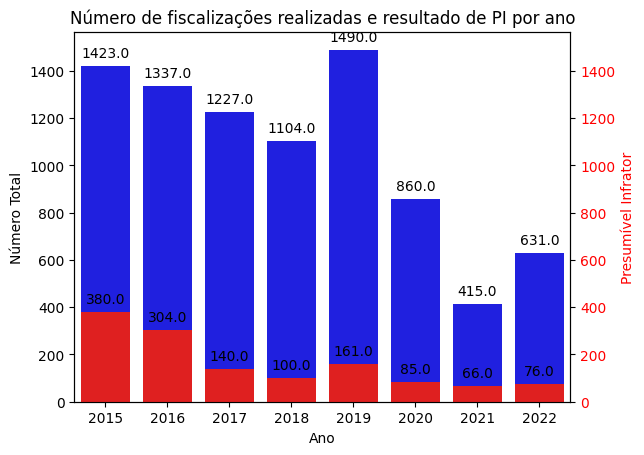

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_pickle('final_fiscrep.pickle')


# Create a bar plot for total fiscalizations using Seaborn
ax = sns.countplot(x="Year", data=df, color='blue')

# Add labels to the total fiscalizations plot
ax.set_title("Número de fiscalizações realizadas e resultado de PI por ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Número Total")

# Create a new dataframe with only "PRESUM" fiscalizations
df_presum = df[df["Result"] == "PRESUM"]

# Create a bar plot for PRESUM fiscalizations using Seaborn
ax2 = ax.twinx()
sns.countplot(x="Year", data=df_presum, ax=ax2, color="red")

# Add labels to the PRESUM fiscalizations plot
ax2.set_ylabel("Presumível Infrator", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Annotate each bar with its value for both plots
for p in ax.patches:
    ax.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
for p in ax2.patches:
    ax2.annotate(format(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Set the same y-axis limits for both plots
ax.set_ylim(0, max(ax.get_ylim()[1], ax2.get_ylim()[1]))
ax2.set_ylim(0, max(ax.get_ylim()[1], ax2.get_ylim()[1]))

# Display the plot
plt.show()


Número de fiscalizações realizadas por NUTS II e resultado PI

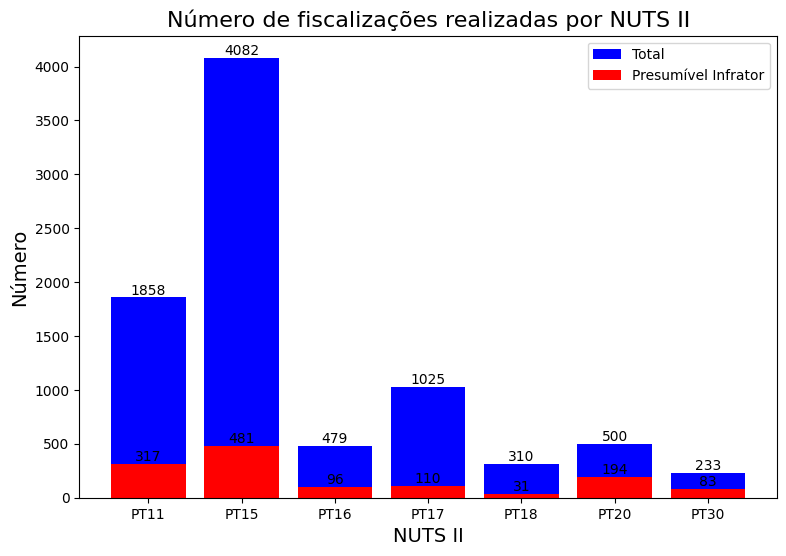

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_pickle('final_fiscrep.pickle')

# Get the count of fiscalizations per 'NUTSII_code'
total_counts = df.groupby("NUTSII_code").size().reset_index(name="Total")

# Create a new DataFrame with only "PRESUM" fiscalizations
df_presum = df[df["Result"] == "PRESUM"]

# Get the count of "PRESUM" fiscalizations per 'NUTSII_code'
presum_counts = df_presum.groupby("NUTSII_code").size().reset_index(name="Presumível Infrator")

# Create a bar plot with both total fiscalizations and PRESUM fiscalizations
plt.figure(figsize=(9, 6))

# Plot total fiscalizations
plt.bar(x=total_counts["NUTSII_code"], height=total_counts["Total"], color='blue', label="Total")

# Plot PRESUM fiscalizations
plt.bar(x=presum_counts["NUTSII_code"], height=presum_counts["Presumível Infrator"], color='red', label="Presumível Infrator")

# Add labels and legend to the plot
plt.title("Número de fiscalizações realizadas por NUTS II", fontsize=16)
plt.xlabel("NUTS II", fontsize=14)
plt.ylabel("Número", fontsize=14)
plt.legend()

# Annotate each bar with its value for total fiscalizations
for i, v in enumerate(total_counts["Total"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Annotate each bar with its value for PRESUM fiscalizations
for i, v in enumerate(presum_counts["Presumível Infrator"]):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the bar plot
plt.show()


Rácio de Presumível Infrator em relação ao Total por NUTS II

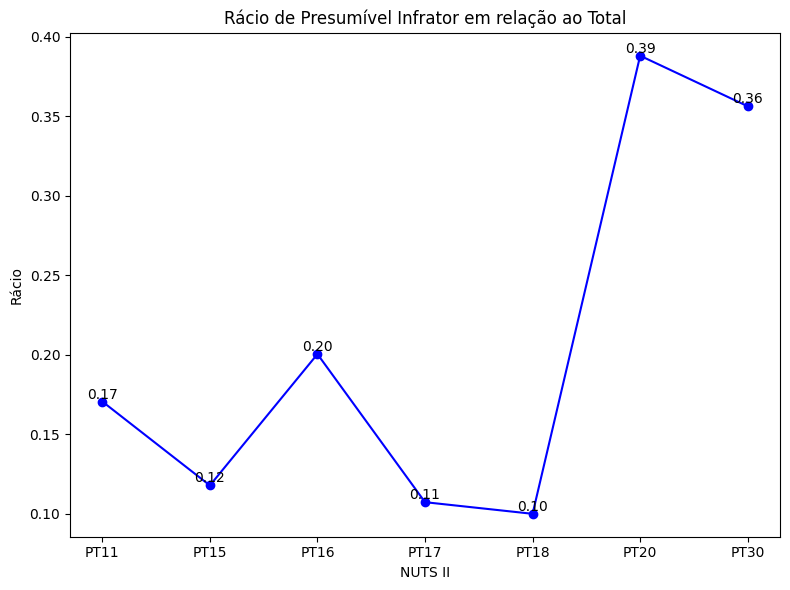

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_pickle('final_fiscrep.pickle')

# Get the count of fiscalizations per 'NUTSII_code'
total_counts = df.groupby("NUTSII_code").size().reset_index(name="Total")

# Create a new DataFrame with only "PRESUM" fiscalizations
df_presum = df[df["Result"] == "PRESUM"]

# Get the count of "PRESUM" fiscalizations per 'NUTSII_code'
presum_counts = df_presum.groupby("NUTSII_code").size().reset_index(name="Presumível Infrator")

# Calculate the ratio of presum_counts over total_counts
ratio = presum_counts["Presumível Infrator"] / total_counts["Total"]

# Create a line plot for the ratio
plt.figure(figsize=(8, 6))
plt.plot(total_counts["NUTSII_code"], ratio, marker='o', color='blue')

# Add labels to the plot
plt.title("Rácio de Presumível Infrator em relação ao Total")
plt.xlabel("NUTS II")
plt.ylabel("Rácio")

# Add the values as text annotations on the line
for x, y in zip(total_counts["NUTSII_code"], ratio):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

# Adjust the layout to avoid overlapping labels
plt.tight_layout()

# Show the line plot
plt.show()




Rácio de fiscalizações PRESUM em relação ao total por ano

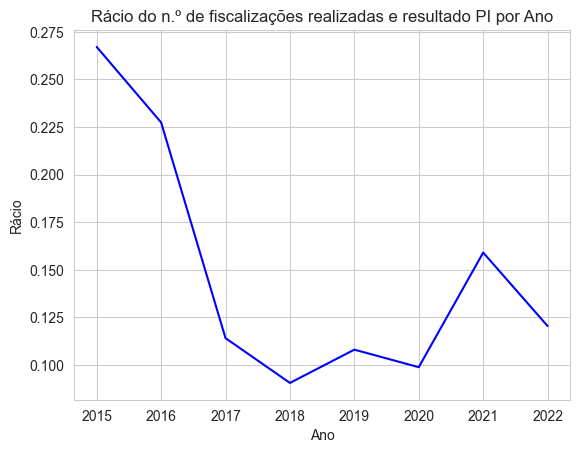

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_pickle('final_fiscrep.pickle')

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a new dataframe with only "PRESUM" fiscalizations
df_presum = df[df["Result"] == "PRESUM"]

# Group the original dataframe by year and count the total number of fiscalizations
df_total = df.groupby("Year")["Result"].count().reset_index()

# Merge the total fiscalizations dataframe with the PRESUM fiscalizations dataframe
df_merged = pd.merge(df_total, df_presum.groupby("Year")["Result"].count().reset_index(), on="Year")

# Calculate the proportion of PRESUM fiscalizations over the total fiscalizations
df_merged["Prop"] = df_merged["Result_y"] / df_merged["Result_x"]

# Create a line plot using Seaborn
sns.lineplot(x="Year", y="Prop", data=df_merged, color="blue")

# Set the title and axis labels
plt.title("Rácio do n.º de fiscalizações realizadas e resultado PI por Ano")
plt.xlabel("Ano")
plt.ylabel("Rácio")

# Display the plot
plt.show()

Número de infrações ano por tipo de infração 

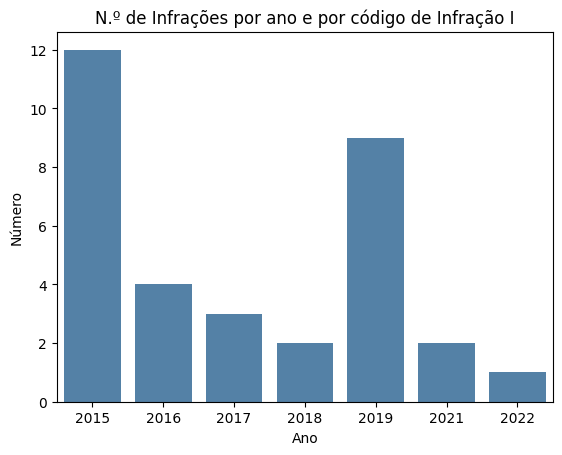

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('final_fiscrep.pickle')

variable = 'I'

infrac_data = df[df[variable] == 1]

color = 'steelblue'

# Create a bar plot using Seaborn
sns.countplot(x="Year", data=infrac_data, color=color)

# Set the title and axis labels
plt.title("N.º de Infrações por ano e por código de Infração " + variable)
plt.xlabel("Ano")
plt.ylabel("Número")

plt.show()



Proporção de infração tendo em conta o nº de fiscalizações

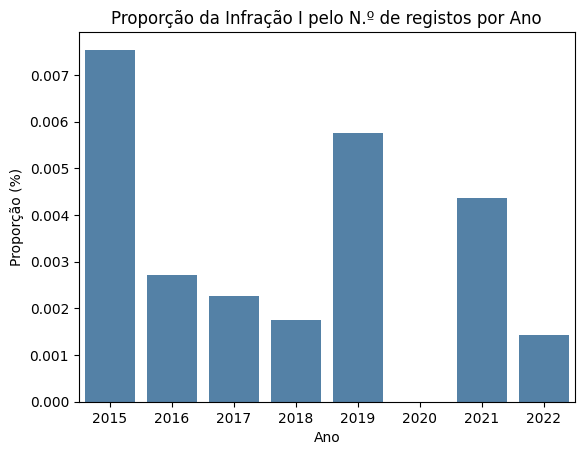

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new dataframe with the counts of the variable by year
counts_df = df.groupby('Year')[variable].value_counts().unstack().fillna(0)
counts_df = counts_df.astype(int)

total_fiscs = counts_df.sum(axis=1).values
infracs_sel = counts_df.loc[:,1].values

# Calculate the proportion of the variable where it equals 1 per year
prop_df = infracs_sel/total_fiscs
prop_df = pd.Series(prop_df, index=counts_df.index)

# Create a bar plot using Seaborn
sns.barplot(x=prop_df.index, y=prop_df, color='steelblue')

# Set the title and axis labels
plt.title('Proporção da Infração {} pelo N.º de registos por Ano'.format(variable))
plt.xlabel('Ano')
plt.ylabel('Proporção (%)')

# Show the plot
plt.show()

Número de fiscalizações por NUTS II

4082


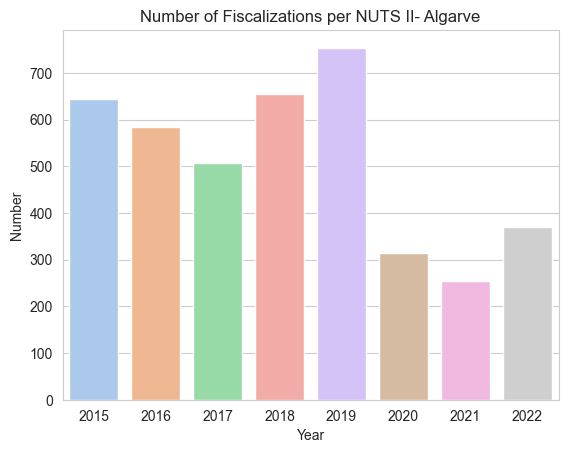

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('final_fiscrep.pickle')

df = df[df['NUTSII_code']=='PT15']
#df = df[df.NameWoDiacritics=='Lisboa']
#df = df[df.NameWoDiacritics.isin(['Caminha', 'Setubal', 'Sesimbra'])]
#df = df[~df.NameWoDiacritics.isin(['Caminha', 'Setubal', 'Sesimbra'])]

print(len(df))

sns.set_style("whitegrid")
sns.set_palette("pastel")


# Create a bar plot using Seaborn
sns.countplot(x="Year", data=df)

# Set the title and axis labels
plt.title("Number of Fiscalizations per NUTS II- Algarve")
plt.xlabel("Year")
plt.ylabel("Number")

plt.show()


Número de Infrações em cada ano por cada NUTS II

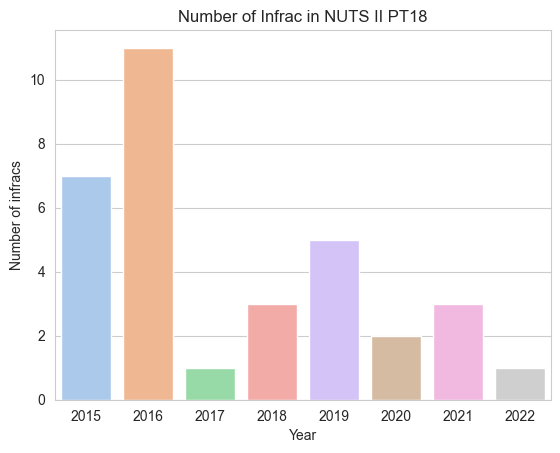

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_pickle('final_fiscrep.pickle')

# Filter the data by NUTSII_code and Result
df_filtered = df[(df['NUTSII_code'] == 'PT18') & (df['Result'] == 'PRESUM')]

sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a countplot using Seaborn
sns.countplot(x=df_filtered['Year'], data=df_filtered)

# Set the title and axis labels
plt.title("Number of Infrac in NUTS II PT18")
plt.xlabel("Year")
plt.ylabel("Number of infracs")

plt.show()

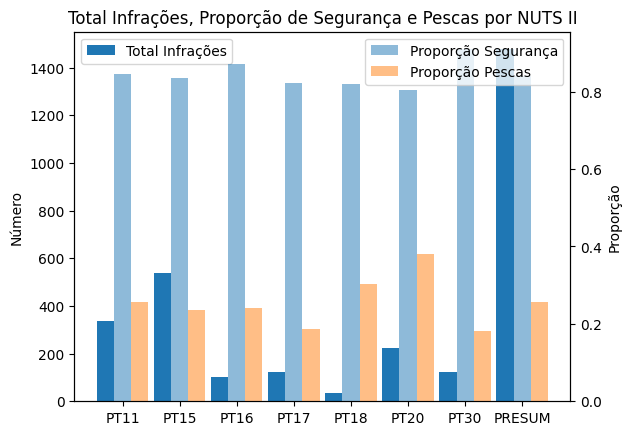

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from 'final_fiscrep.pickle' file
df = pd.read_pickle('final_fiscrep.pickle')

# Filter the rows with 'PRESUM' in 'Result' column
df_presum = df[df['Result'] == 'PRESUM']

# Group by NUTSII_code and calculate the sums
grouped_df = df.groupby('NUTSII_code').agg({
    'Result': lambda x: (x == 'PRESUM').sum(),  # Total fiscalizations with 'PRESUM' result
    'security': lambda x: (x == 'S').sum(),  # Sum of 'S' in security column
    'fishery': lambda x: (x == 'P').sum()  # Sum of 'P' in fishery column
}).rename(columns={'Result': 'Total Infrações', 'security': 'Segurança', 'fishery': 'Pescas'})

# Add the sums for 'PRESUM' rows as a new row in the grouped DataFrame
grouped_df.loc['PRESUM'] = [df_presum.shape[0], (df_presum['security'] == 'S').sum(), (df_presum['fishery'] == 'P').sum()]

# Calculate the proportions
grouped_df['Proporção Segurança'] = grouped_df['Segurança'] / grouped_df['Total Infrações']
grouped_df['Proporção Pescas'] = grouped_df['Pescas'] / grouped_df['Total Infrações']

# Create a bar plot
fig, ax1 = plt.subplots()

# Set the width of each bar
bar_width = 0.3

# Set the positions of the bars on the x-axis
positions = np.arange(len(grouped_df.index))

# Plot the bars for total infrações
ax1.bar(positions - bar_width, grouped_df['Total Infrações'], width=bar_width, align='center', label='Total Infrações')

# Set the y-axis label for total infrações
ax1.set_ylabel('Número')

# Create a second y-axis for the proportions
ax2 = ax1.twinx()

# Plot the bars for proporção segurança
ax2.bar(positions, grouped_df['Proporção Segurança'], width=bar_width, align='center', label='Proporção Segurança', alpha=0.5)

# Plot the bars for proporção pescas
ax2.bar(positions + bar_width, grouped_df['Proporção Pescas'], width=bar_width, align='center', label='Proporção Pescas', alpha=0.5)

# Set the y-axis label for proportions
ax2.set_ylabel('Proporção')

# Set the x-axis tick positions and labels
ax1.set_xticks(positions)
ax1.set_xticklabels(grouped_df.index)

# Set the title
ax1.set_title('Total Infrações, Proporção de Segurança e Pescas por NUTS II')

# Add a legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

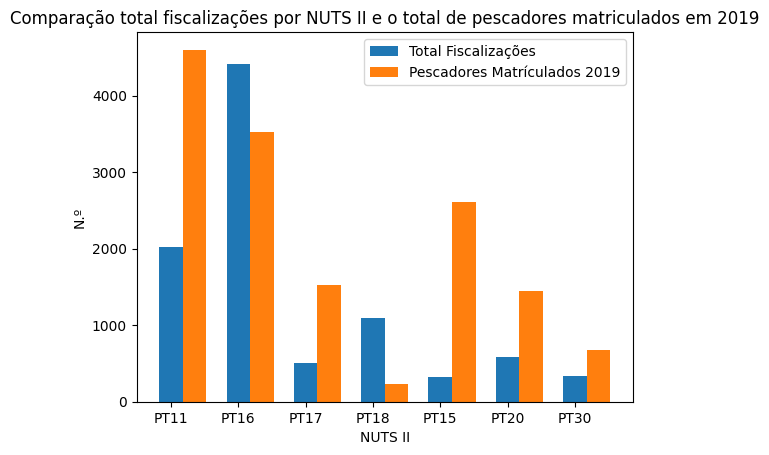

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q13')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the sum of 'NUTSII_code' for each NUTS II in the pickle file
fiscrep_sum = df_fiscrep.groupby('NUTSII_code').size()

# Set 'NUTSII_code' as the index in the INE DataFrame
df_ine.set_index('NUTSII_code', inplace=True)

# Create a bar plot
fig, ax = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(df_ine))
ax.set_xticks(positions)
ax.set_xticklabels(df_ine.index)

# Set the width of the bars
bar_width = 0.35

# Plot the bar plot for 'final_fiscrep.pickle' data
ax.bar(positions, fiscrep_sum, width=bar_width, align='center', label='Total Fiscalizações')

# Plot the bar plot for 'INE.xlsx' data
ax.bar([p + bar_width for p in positions], df_ine['Total_2019'], width=bar_width, align='center', label='Pescadores Matrículados 2019')

# Set the title and axis labels
ax.set_title('Comparação total fiscalizações por NUTS II e o total de pescadores matriculados em 2019')
ax.set_xlabel('NUTS II')
ax.set_ylabel('N.º')

# Add a legend
ax.legend()

plt.show()

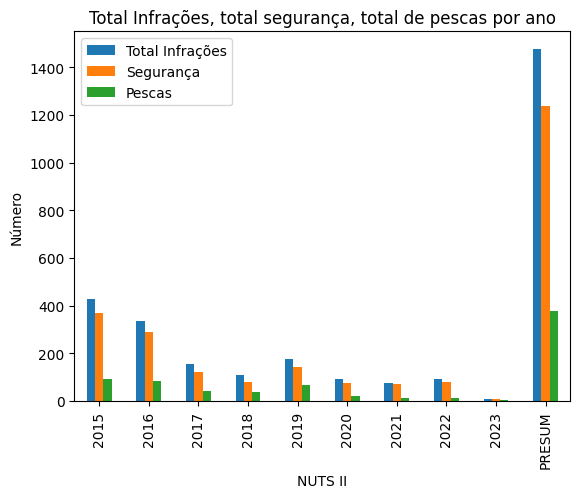

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'final_fiscrep.pickle' file
df = pd.read_pickle('final_fiscrep.pickle')

# Filter the rows with 'PRESUM' in 'Result' column
df_presum = df[df['Result'] == 'PRESUM']

# Group by NUTSII_code and calculate the sums
grouped_df = df.groupby('Year').agg({
    'Result': lambda x: (x == 'PRESUM').sum(),  # Total fiscalizations with 'PRESUM' result
    'security': lambda x: (x == 'S').sum(),  # Sum of 'S' in security column
    'fishery': lambda x: (x == 'P').sum()  # Sum of 'P' in fishery column
}).rename(columns={'Result': 'Total Infrações', 'security': 'Segurança', 'fishery': 'Pescas'})

# Add the sums for 'PRESUM' rows as a new row in the grouped DataFrame
grouped_df.loc['PRESUM'] = [df_presum.shape[0], (df_presum['security'] == 'S').sum(), (df_presum['fishery'] == 'P').sum()]

# Create a bar plot
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Total Infrações, total segurança, total de pescas por ano')
ax.set_xlabel('NUTS II')
ax.set_ylabel('Número')

plt.show()

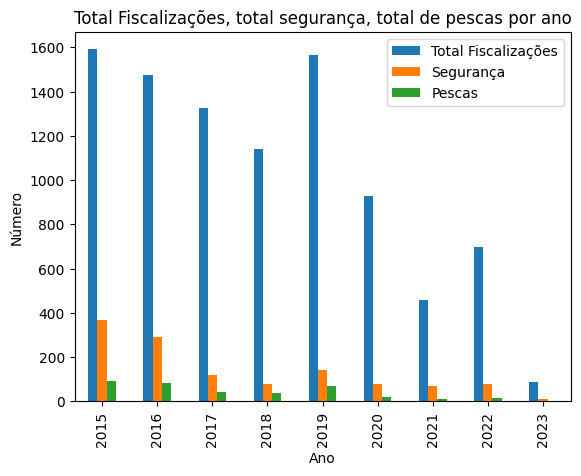

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'final_fiscrep.pickle' file
df = pd.read_pickle('final_fiscrep.pickle')


# Group by NUTSII_code and calculate the sums
grouped_df = df.groupby('Year').agg({
    'Year': 'count',  # Total fiscalizations
    'security': lambda x: (x == 'S').sum(),  # Sum of 'S' in security column
    'fishery': lambda x: (x == 'P').sum()  # Sum of 'P' in fishery column
}).rename(columns={'Year': 'Total Fiscalizações', 'security': 'Segurança', 'fishery': 'Pescas'})


# Create a bar plot
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Total Fiscalizações, total segurança, total de pescas por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número')

plt.show()

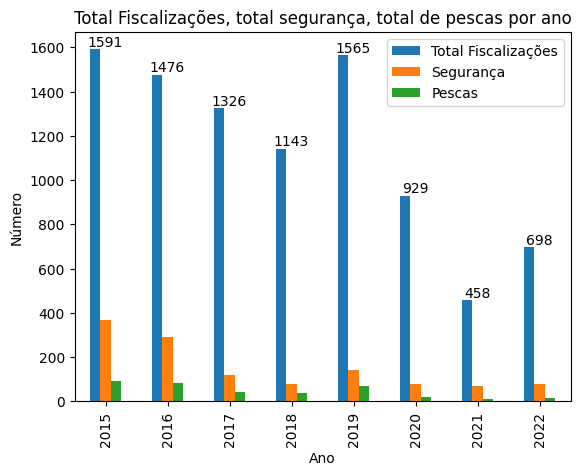

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'final_fiscrep.pickle' file
df = pd.read_pickle('final_fiscrep.pickle')

# Filter out the data for the year 2023
df_filtered = df[df['Year'] != 2023]

# Group by Year and calculate the sums
grouped_df = df_filtered.groupby('Year').agg({
    'Year': 'count',  # Total fiscalizations
    'security': lambda x: (x == 'S').sum(),  # Sum of 'S' in security column
    'fishery': lambda x: (x == 'P').sum()  # Sum of 'P' in fishery column
}).rename(columns={'Year': 'Total Fiscalizações', 'security': 'Segurança', 'fishery': 'Pescas'})

# Create a bar plot
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Total Fiscalizações, total segurança, total de pescas por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número')

# Add the total number on top of each bar
for i, v in enumerate(grouped_df['Total Fiscalizações']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()


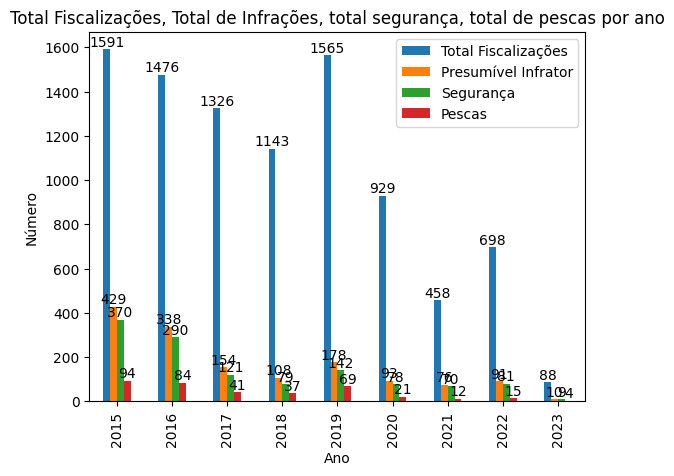

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'final_fiscrep.pickle' file
df = pd.read_pickle('final_fiscrep.pickle')

# Filter rows with 'PRESUM' in the 'Result' column
presum_rows = df[df['Result'] == 'PRESUM']

# Group by Year and calculate the sums
grouped_df = df.groupby('Year').agg({
    'Year': 'count',  # Total fiscalizations
    'Result': lambda x: (x == 'PRESUM').sum(),  # Total fiscalizations with 'PRESUM' results
    'security': lambda x: (x == 'S').sum(),  # Sum of 'S' in security column
    'fishery': lambda x: (x == 'P').sum(),  # Sum of 'P' in fishery column
}).rename(columns={'Year': 'Total Fiscalizações', 'Result': 'Presumível Infrator', 'security': 'Segurança', 'fishery': 'Pescas'})

# Create a bar plot
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Total Fiscalizações, Total de Infrações, total segurança, total de pescas por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número')

# Add the total numbers above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()




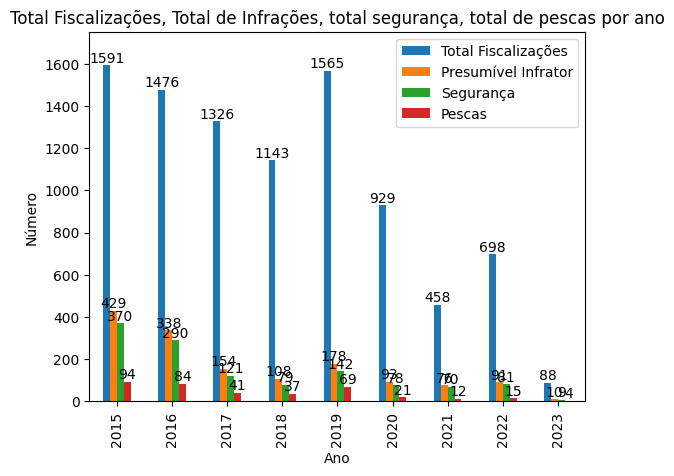

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'final_fiscrep.pickle' file
df = pd.read_pickle('final_fiscrep.pickle')

# Filter rows with 'PRESUM' in the 'Result' column
presum_rows = df[df['Result'] == 'PRESUM']

# Group by Year and calculate the sums
grouped_df = df.groupby('Year').agg({
    'Year': 'count',  # Total fiscalizations
    'Result': lambda x: (x == 'PRESUM').sum(),  # Total fiscalizations with 'PRESUM' results
    'security': lambda x: (x == 'S').sum(),  # Sum of 'S' in security column
    'fishery': lambda x: (x == 'P').sum(),  # Sum of 'P' in fishery column
}).rename(columns={'Year': 'Total Fiscalizações', 'Result': 'Presumível Infrator', 'security': 'Segurança', 'fishery': 'Pescas'})

# Create a bar plot
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Total Fiscalizações, Total de Infrações, total segurança, total de pescas por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número')

# Add the total numbers above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the y-axis limits
ax.set_ylim(0, grouped_df.max().max() * 1.1)

plt.show()


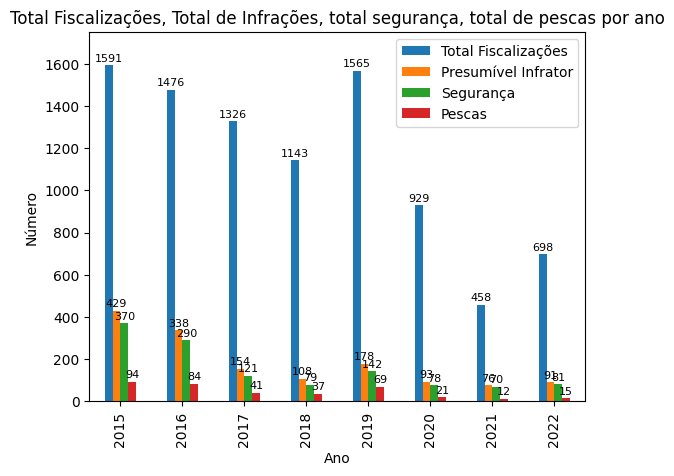

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'final_fiscrep.pickle' file
df = pd.read_pickle('final_fiscrep.pickle')

# Filter rows with 'PRESUM' in the 'Result' column
presum_rows = df[df['Result'] == 'PRESUM']

# Group by Year and calculate the sums
grouped_df = df.groupby('Year').agg({
    'Year': 'count',  # Total fiscalizations
    'Result': lambda x: (x == 'PRESUM').sum(),  # Total fiscalizations with 'PRESUM' results
    'security': lambda x: (x == 'S').sum(),  # Sum of 'S' in security column
    'fishery': lambda x: (x == 'P').sum(),  # Sum of 'P' in fishery column
}).rename(columns={'Year': 'Total Fiscalizações', 'Result': 'Presumível Infrator', 'security': 'Segurança', 'fishery': 'Pescas'})

# Create a bar plot
fig, ax = plt.subplots()
grouped_df.plot(kind='bar', ax=ax)

# Set the title and axis labels
ax.set_title('Total Fiscalizações, Total de Infrações, total segurança, total de pescas por ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número')

# Add the total numbers above each bar with adjusted fontsize
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

# Set the y-axis limits
ax.set_ylim(0, grouped_df.max().max() * 1.1)

plt.show()


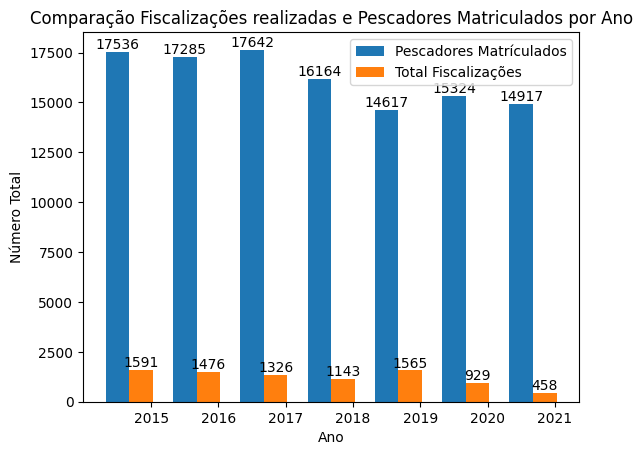

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q13')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the count of rows for each year in 'final_fiscrep.pickle'
fiscrep_count = df_fiscrep['Year'].value_counts().sort_index()

# Get the common years between 'final_fiscrep.pickle' and 'INE.xlsx'
common_years = list(set(fiscrep_count.index).intersection(df_ine.columns))

# Sort the common years in ascending order
common_years.sort()

# Filter the INE DataFrame for common years
df_ine_common = df_ine[common_years].sum()

# Create a bar plot
fig, ax = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(common_years))
labels = common_years
ax.set_xticks([p + 0.5 for p in positions])
ax.set_xticklabels(labels)

# Set the width of the bars
bar_width = 0.35

# Plot the bar plot for 'INE.xlsx' data ('Pescadores Matrículados')
ax.bar(positions, df_ine_common, width=bar_width, align='center', label='Pescadores Matrículados')

# Plot the bar plot for 'final_fiscrep.pickle' data ('Total Fiscalizações')
ax.bar([p + bar_width for p in positions], fiscrep_count[common_years], width=bar_width, align='center', label='Total Fiscalizações')

# Set the title and axis labels
ax.set_title('Comparação Fiscalizações realizadas e Pescadores Matriculados por Ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número Total')

# Add numbers on each bar
for i, count in enumerate(df_ine_common):
    ax.text(i, count, str(count), ha='center', va='bottom')
for i, count in enumerate(fiscrep_count[common_years]):
    ax.text(i + bar_width, count, str(count), ha='center', va='bottom')

# Add a legend
ax.legend()

plt.show()




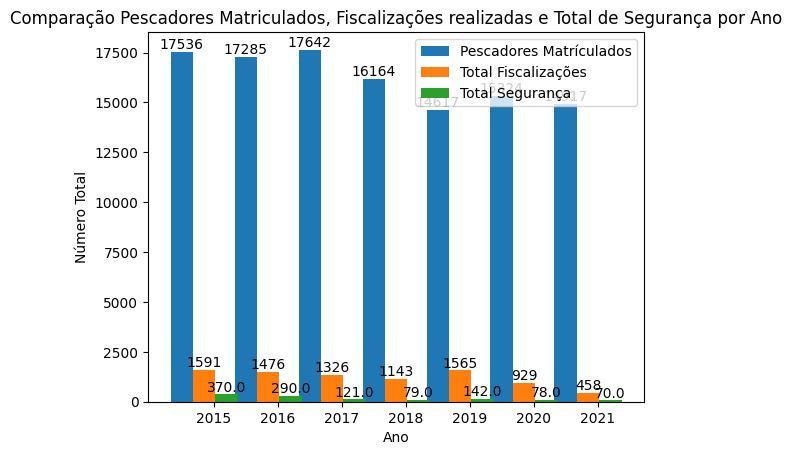

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q13')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the count of rows for each year in 'final_fiscrep.pickle'
fiscrep_count = df_fiscrep['Year'].value_counts().sort_index()

# Get the common years between 'final_fiscrep.pickle' and 'INE.xlsx'
common_years = list(set(fiscrep_count.index).intersection(df_ine.columns))

# Sort the common years in ascending order
common_years.sort()

# Filter the INE DataFrame for common years
df_ine_common = df_ine[common_years].sum()

# Calculate the count of 'S' values in the 'security' column for each year
security_count = df_fiscrep[df_fiscrep['Year'].isin(common_years)].groupby('Year')['security'].apply(lambda x: x.str.count('S').sum())

# Create a bar plot
fig, ax = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(common_years))
labels = common_years
ax.set_xticks([p + 0.5 for p in positions])
ax.set_xticklabels(labels)

# Set the width of the bars
bar_width = 0.35

# Plot the bar plot for 'INE.xlsx' data ('Pescadores Matrículados')
ax.bar(positions, df_ine_common, width=bar_width, align='center', label='Pescadores Matrículados')

# Plot the bar plot for 'final_fiscrep.pickle' data ('Total Fiscalizações')
ax.bar([p + bar_width for p in positions], fiscrep_count[common_years], width=bar_width, align='center', label='Total Fiscalizações')

# Plot the bar plot for 'final_fiscrep.pickle' data ('Total Security')
ax.bar([p + 2*bar_width for p in positions], security_count, width=bar_width, align='center', label='Total Segurança')

# Set the title and axis labels
ax.set_title('Comparação Pescadores Matriculados, Fiscalizações realizadas e Total de Segurança por Ano')
ax.set_xlabel('Ano')
ax.set_ylabel('Número Total')

# Add numbers on each bar
for i, count in enumerate(df_ine_common):
    ax.text(i, count, str(count), ha='center', va='bottom')
for i, count in enumerate(fiscrep_count[common_years]):
    ax.text(i + bar_width, count, str(count), ha='center', va='bottom')
for i, count in enumerate(security_count):
    ax.text(i + 2*bar_width, count, str(count), ha='center', va='bottom')

# Add a legend
ax.legend()

plt.show()


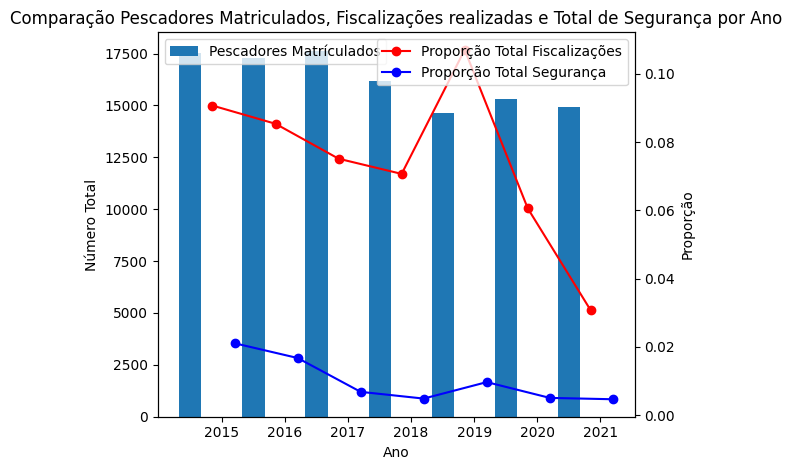

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q13')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the count of rows for each year in 'final_fiscrep.pickle'
fiscrep_count = df_fiscrep['Year'].value_counts().sort_index()

# Get the common years between 'final_fiscrep.pickle' and 'INE.xlsx'
common_years = list(set(fiscrep_count.index).intersection(df_ine.columns))

# Sort the common years in ascending order
common_years.sort()

# Filter the INE DataFrame for common years
df_ine_common = df_ine[common_years].sum()

# Calculate the count of 'S' values in the 'security' column for each year
security_count = df_fiscrep[df_fiscrep['Year'].isin(common_years)].groupby('Year')['security'].apply(lambda x: x.str.count('S').sum())

# Calculate the proportions
fiscrep_proportions = fiscrep_count[common_years] / df_ine_common
security_proportions = security_count / df_ine_common

# Create a bar plot
fig, ax1 = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(common_years))
labels = common_years
ax1.set_xticks([p + 0.5 for p in positions])
ax1.set_xticklabels(labels)

# Set the width of the bars
bar_width = 0.35

# Plot the bar plot for 'Pescadores Matrículados'
ax1.bar(positions, df_ine_common, width=bar_width, align='center', label='Pescadores Matrículados')
ax1.set_ylabel('Número Total')

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the bar plot for 'Total Fiscalizações' proportions
ax2.plot([p + bar_width for p in positions], fiscrep_proportions, marker='o', color='red', label='Proporção Total Fiscalizações')
ax2.set_ylabel('Proporção')

# Plot the bar plot for 'Total Segurança' proportions
ax2.plot([p + 2*bar_width for p in positions], security_proportions, marker='o', color='blue', label='Proporção Total Segurança')

# Set the title and axis labels
ax1.set_title('Comparação Pescadores Matriculados, Fiscalizações realizadas e Total de Segurança por Ano')
ax1.set_xlabel('Ano')

# Set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the layout
fig.tight_layout()

plt.show()


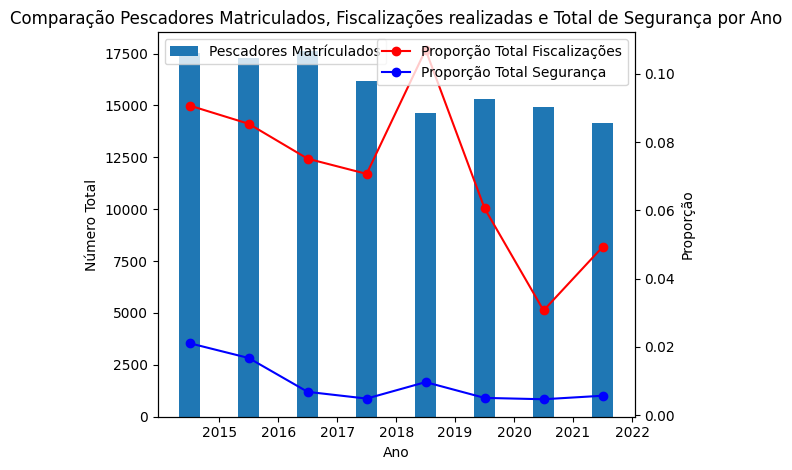

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q12')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the count of rows for each year in 'final_fiscrep.pickle'
fiscrep_count = df_fiscrep['Year'].value_counts().sort_index()

# Get the common years between 'final_fiscrep.pickle' and 'INE.xlsx'
common_years = list(set(fiscrep_count.index).intersection(df_ine.columns))

# Sort the common years in ascending order
common_years.sort()

# Filter the INE DataFrame for common years
df_ine_common = df_ine[common_years].sum()

# Calculate the count of 'S' values in the 'security' column for each year
security_count = df_fiscrep[df_fiscrep['Year'].isin(common_years)].groupby('Year')['security'].apply(lambda x: x.str.count('S').sum())

# Calculate the proportions
fiscrep_proportions = fiscrep_count[common_years] / df_ine_common
security_proportions = security_count / df_ine_common

# Create a bar plot
fig, ax1 = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(common_years))
labels = common_years
ax1.set_xticks([p + 0.5 for p in positions])
ax1.set_xticklabels(labels)

# Set the width of the bars
bar_width = 0.35

# Plot the bar plot for 'Pescadores Matrículados'
ax1.bar(positions, df_ine_common, width=bar_width, align='center', label='Pescadores Matrículados')
ax1.set_ylabel('Número Total')

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the bar plot for 'Total Fiscalizações' proportions
ax2.plot(positions, fiscrep_proportions, marker='o', color='red', label='Proporção Total Fiscalizações')
ax2.set_ylabel('Proporção')

# Plot the bar plot for 'Total Segurança' proportions
ax2.plot(positions, security_proportions, marker='o', color='blue', label='Proporção Total Segurança')

# Set the title and axis labels
ax1.set_title('Comparação Pescadores Matriculados, Fiscalizações realizadas e Total de Segurança por Ano')
ax1.set_xlabel('Ano')

# Set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the layout
fig.tight_layout()

plt.show()


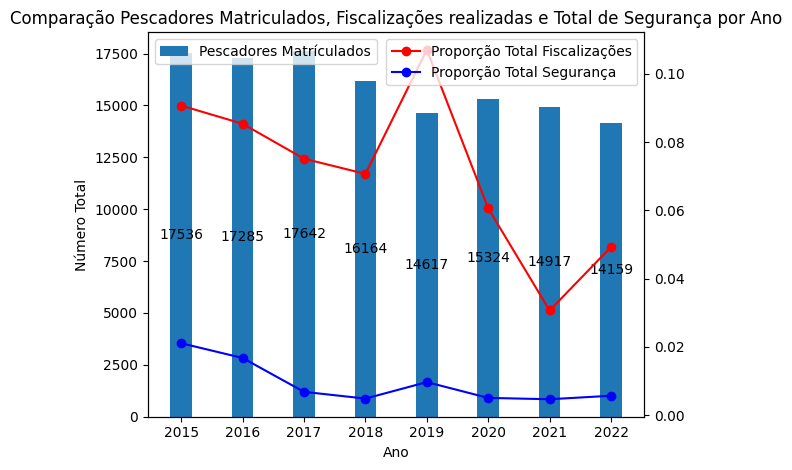

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q12')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the count of rows for each year in 'final_fiscrep.pickle'
fiscrep_count = df_fiscrep['Year'].value_counts().sort_index()

# Get the common years between 'final_fiscrep.pickle' and 'INE.xlsx'
common_years = list(set(fiscrep_count.index).intersection(df_ine.columns))

# Sort the common years in ascending order
common_years.sort()

# Filter the INE DataFrame for common years
df_ine_common = df_ine[common_years].sum()

# Calculate the count of 'S' values in the 'security' column for each year
security_count = df_fiscrep[df_fiscrep['Year'].isin(common_years)].groupby('Year')['security'].apply(lambda x: x.str.count('S').sum())

# Calculate the proportions
fiscrep_proportions = fiscrep_count[common_years] / df_ine_common
security_proportions = security_count / df_ine_common

# Create a bar plot
fig, ax1 = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(common_years))
labels = common_years
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Ano')

# Set the width of the bars
bar_width = 0.35

# Plot the bar plot for 'Pescadores Matrículados'
ax1.bar(positions, df_ine_common, width=bar_width, align='center', label='Pescadores Matrículados')
ax1.set_ylabel('Número Total')

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the bar plot for 'Total Fiscalizações' proportions
ax2.plot(positions, fiscrep_proportions, marker='o', color='red', label='Proporção Total Fiscalizações')

# Plot the bar plot for 'Total Segurança' proportions
ax2.plot(positions, security_proportions, marker='o', color='blue', label='Proporção Total Segurança')

# Set the title and axis labels
ax1.set_title('Comparação Pescadores Matriculados, Fiscalizações realizadas e Total de Segurança por Ano')

# Set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the layout
fig.tight_layout()

# Center the bars with the x-axis labels
ax1.bar_label(ax1.containers[0], labels=df_ine_common.values.astype(str), label_type='center')

plt.show()


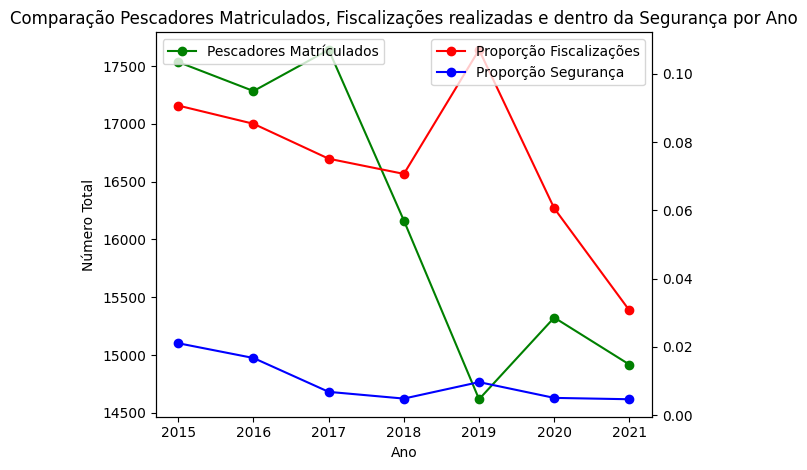

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q13')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the count of rows for each year in 'final_fiscrep.pickle'
fiscrep_count = df_fiscrep['Year'].value_counts().sort_index()

# Get the common years between 'final_fiscrep.pickle' and 'INE.xlsx'
common_years = list(set(fiscrep_count.index).intersection(df_ine.columns))

# Sort the common years in ascending order
common_years.sort()

# Filter the INE DataFrame for common years
df_ine_common = df_ine[common_years].sum()

# Calculate the count of 'S' values in the 'security' column for each year
security_count = df_fiscrep[df_fiscrep['Year'].isin(common_years)].groupby('Year')['security'].apply(lambda x: x.str.count('S').sum())

# Calculate the proportions
fiscrep_proportions = fiscrep_count[common_years] / df_ine_common
security_proportions = security_count / df_ine_common

# Create a line plot
fig, ax1 = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(common_years))
labels = common_years
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Ano')

# Plot the line plot for 'Pescadores Matrículados'
ax1.plot(positions, df_ine_common, marker='o', color='green', label='Pescadores Matrículados')
ax1.set_ylabel('Número Total')

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the line plot for 'Total Fiscalizações' proportions
ax2.plot(positions, fiscrep_proportions, marker='o', color='red', label='Proporção Fiscalizações')

# Plot the line plot for 'Total Segurança' proportions
ax2.plot(positions, security_proportions, marker='o', color='blue', label='Proporção Segurança')

# Set the title and axis labels
ax1.set_title('Comparação Pescadores Matriculados, Fiscalizações realizadas e dentro da Segurança por Ano')

# Set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the layout
fig.tight_layout()

plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from 'INE.xlsx' file
df_ine = pd.read_excel('INE.xlsx', sheet_name='Q12')

# Read the data from 'final_fiscrep.pickle' file
df_fiscrep = pd.read_pickle('final_fiscrep.pickle')

# Calculate the count of rows for each year in 'final_fiscrep.pickle'
fiscrep_count = df_fiscrep['Year'].value_counts().sort_index()

# Get the common years between 'final_fiscrep.pickle' and 'INE.xlsx'
common_years = list(set(fiscrep_count.index).intersection(df_ine.columns))

# Sort the common years in ascending order
common_years.sort()

# Filter the INE DataFrame for common years
df_ine_common = df_ine[common_years].sum()

# Calculate the count of 'S' values in the 'security' column for each year
security_count = df_fiscrep[df_fiscrep['Year'].isin(common_years)].groupby('Year')['security'].apply(lambda x: x.str.count('S').sum())

# Calculate the proportions
fiscrep_proportions = fiscrep_count[common_years] / df_ine_common
security_proportions = security_count / df_ine_common

# Calculate the count of 'PRESUM' results in the 'Result' column for each year
result_presum_count = df_fiscrep[df_fiscrep['Year'].isin(common_years)].groupby('Year')['Result'].apply(lambda x: x.str.count('PRESUM').sum())

# Calculate the proportions of 'PRESUM' results
result_presum_proportions = result_presum_count / df_ine_common

# Create a line plot
fig, ax1 = plt.subplots()

# Set the x-axis tick positions and labels
positions = range(len(common_years))
labels = common_years
ax1.set_xticks(positions)
ax1.set_xticklabels(labels)
ax1.set_xlabel('Ano')

# Plot the line plot for 'Pescadores Matrículados'
ax1.plot(positions, df_ine_common, marker='o', color='green', label='Pescadores Matrículados')
ax1.set_ylabel('Número Total')

# Create the secondary y-axis
ax2 = ax1.twinx()

# Plot the line plot for 'Total Fiscalizações' proportions
ax2.plot(positions, fiscrep_proportions, marker='o', color='red', label='Rácio Fiscalizações')

# Plot the line plot for 'Total Segurança' proportions
ax2.plot(positions, security_proportions, marker='o', color='blue', label='Rácio Segurança')

# Plot the line plot for 'PRESUM' results proportions
ax2.plot(positions, result_presum_proportions, marker='o', color='purple', label='Rácio Resultados PI')

# Set the title and axis labels
ax1.set_title('Rácio Pescadores Matriculados e Fiscalizações realizadas, Total de Segurança e Resultados PI por Ano')

# Set the legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Adjust the layout
fig.tight_layout()

plt.show()


KeyError: 'Column not found: security'